In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


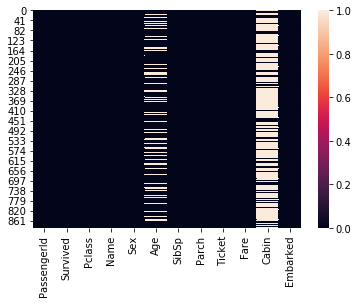

In [5]:
sns.heatmap(data.isnull())

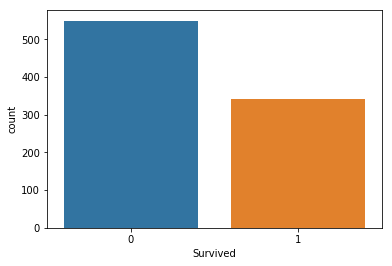

In [6]:
sns.countplot(x='Survived', data=data)

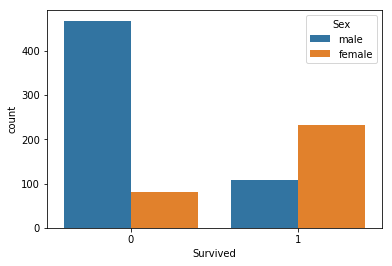

In [7]:
sns.countplot(x='Survived', data=data, hue='Sex')

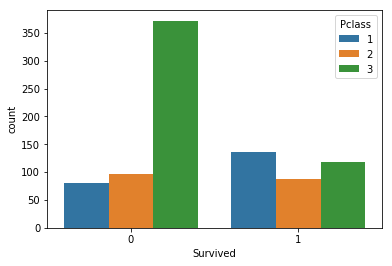

In [8]:
sns.countplot(x='Survived', data=data, hue='Pclass')

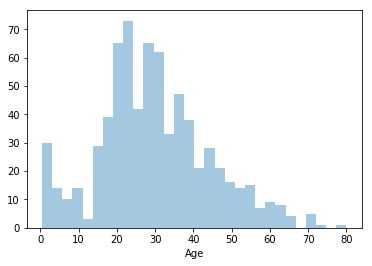

In [9]:
sns.distplot(data['Age'].dropna(), kde=False, bins=30)

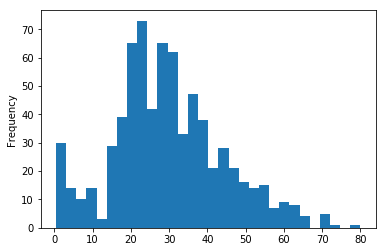

In [10]:
data['Age'].plot.hist(bins=30)

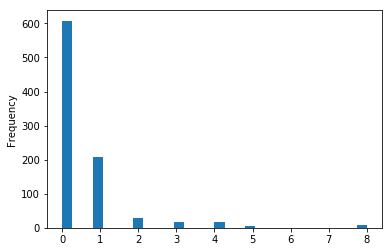

In [11]:
data['SibSp'].plot.hist(bins=30)

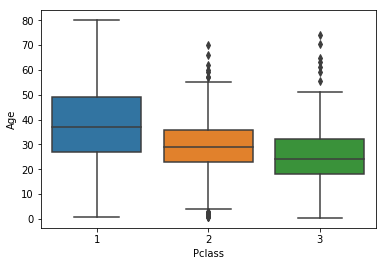

In [12]:
sns.boxplot(x='Pclass', y='Age', data=data)

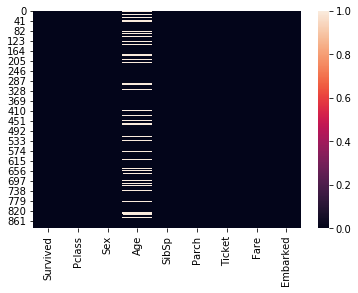

In [17]:
sns.heatmap(data.isnull())

In [16]:
data.drop('Name',axis=1, inplace=True)  # eliminar columnas no numéricas

In [22]:
def fill_age(columns):
    age = columns[0]
    pclass = columns[1]
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        else:
            return 25
    else:
        return age

In [23]:
data['Age'] = data[['Age', 'Pclass']].apply(fill_age, axis=1)

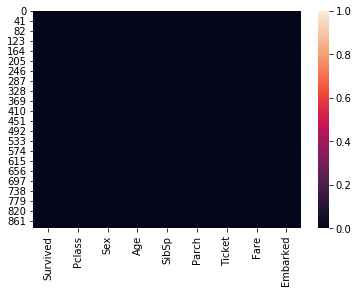

In [24]:
sns.heatmap(data.isnull())

In [26]:
data.drop('Ticket', axis=1, inplace=True)

In [27]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [31]:
sex = pd.get_dummies(data['Sex'], drop_first=True)

In [32]:
data = pd.concat([data, sex], axis=1)

In [33]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1
5,0,3,male,25.0,0,0,8.4583,Q,1
6,0,1,male,54.0,0,0,51.8625,S,1
7,0,3,male,2.0,3,1,21.0750,S,1
8,1,3,female,27.0,0,2,11.1333,S,0
9,1,2,female,14.0,1,0,30.0708,C,0


In [34]:
data.drop('Sex', axis=1, inplace=True)
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1
5,0,3,25.0,0,0,8.4583,Q,1
6,0,1,54.0,0,0,51.8625,S,1
7,0,3,2.0,3,1,21.0750,S,1
8,1,3,27.0,0,2,11.1333,S,0
9,1,2,14.0,1,0,30.0708,C,0


In [35]:
puerto = pd.get_dummies(data['Embarked'])
puerto

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [36]:
puerto = pd.get_dummies(data['Embarked'], drop_first=True)
puerto

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [45]:
data = pd.concat([data, puerto], axis=1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [43]:
data.drop('Embarked', axis=1, inplace=True)

In [48]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [46]:
y = data['Survived']
X = data.drop('Survived', axis=1)

In [51]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [57]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
650,3,25.0,0,0,7.8958,1,0,1
784,3,25.0,0,0,7.0500,1,0,1
125,3,12.0,1,0,11.2417,1,0,0
54,1,65.0,0,1,61.9792,1,0,0
446,2,13.0,0,1,19.5000,0,0,1


In [59]:
model = LogisticRegression()

In [60]:
model.fit(X_train,y_train)

C:\Users\gianc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
predicciones = model.predict(X_test)

In [65]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       178
           1       0.75      0.76      0.75        90

   micro avg       0.83      0.83      0.83       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268



In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicciones)

array([[155,  23],
       [ 22,  68]], dtype=int64)